# importing modules

In [4]:

import pandas as pd
import numpy as np

pd.set_option('display.precision',2)

In [6]:
df = pd.read_csv('Churn_Modelling.csv')
df.head() #display the first five lines using head() method

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape #number of rows and columns

(10000, 14)

In [8]:
df.columns#list all columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df['Exited'] = df['Exited'].astype('bool')#changing the column type  with astype

In [11]:
df.info() #general info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  bool   
dtypes: bool(1), float64(2), int64(8), object(3)
memory usage: 1.0+ MB


In [12]:
df.describe()#The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00,1.00e+04,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,1.57e+07,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24
std,2886.90,7.19e+04,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49
min,1.00,1.56e+07,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,2500.75,1.56e+07,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11
50%,5000.50,1.57e+07,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91
75%,7500.25,1.58e+07,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25
max,10000.00,1.58e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48


In [14]:
#statistics of non-numerical features
df.describe(include=['bool','object'])

,Surname,Geography,Gender,Exited
count,10000,10000,10000,10000
unique,2932,3,2,2
top,Smith,France,Male,False
freq,32,5014,5457,7963


In [15]:
#For categorical (type object) and boolean (type bool) features we can use the value_counts method.
df['Exited'].value_counts()

Exited
False    7963
True     2037
Name: count, dtype: int64

In [16]:
#fraction form 
df['Exited'].value_counts(normalize=True)

Exited
False    0.8
True     0.2
Name: proportion, dtype: float64

# SORTING
#sorting is done according to columns 


In [17]:
df.sort_values(by='Surname',ascending=False).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7739,7740,15689952,Zuyeva,724,Spain,Male,41,5,0.00,1,0,1,115753.94,False
6385,6386,15706810,Zuyeva,606,Germany,Female,32,1,106301.85,2,0,1,59061.25,False
586,587,15722010,Zuyev,621,Spain,Male,53,9,170491.84,1,1,0,35588.07,True
6973,6974,15583394,Zuyev,659,Germany,Male,39,8,106259.63,2,1,1,198103.32,False
1030,1031,15681174,Zuev,730,France,Male,39,1,116537.60,1,0,0,145679.60,False


In [18]:
#multiple rows sorting
df.sort_values(by=['Exited','Surname'],ascending=[True,False]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6385,6386,15706810,Zuyeva,606,Germany,Female,32,1,106301.85,2,0,1,59061.25,False
7739,7740,15689952,Zuyeva,724,Spain,Male,41,5,0.00,1,0,1,115753.94,False
6973,6974,15583394,Zuyev,659,Germany,Male,39,8,106259.63,2,1,1,198103.32,False
1030,1031,15681174,Zuev,730,France,Male,39,1,116537.60,1,0,0,145679.60,False
2946,2947,15727696,Zubareva,592,France,Male,42,1,147249.29,2,1,1,63023.02,False


In [19]:
#indexing and retrieving data
df['CreditScore'].mean()

650.5288

In [23]:
df['Exited'].astype('int64')

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
df[df['Exited']==1]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,True
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,True
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,True
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,True
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,True
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,True
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,True


# Indexing

In [26]:
df.loc[0:5]#loc is used for indexing by name
#first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,True
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,True
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,True


In [27]:
#choosing columns
df.loc[0:5,'RowNumber':'Surname']

,RowNumber,CustomerId,Surname
0,1,15634602,Hargrave
1,2,15647311,Hill
2,3,15619304,Onio
3,4,15701354,Boni
4,5,15737888,Mitchell
5,6,15574012,Chu


In [28]:
#iloc: indexing by number
df.iloc[0:5,0:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography
0,1,15634602,Hargrave,619,France
1,2,15647311,Hill,608,Spain
2,3,15619304,Onio,502,France
3,4,15701354,Boni,699,France
4,5,15737888,Mitchell,850,Spain


In [29]:
df[:1]# first line of the dataframe

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,True


In [31]:
df[-1:]#last line

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,False


# apply fucntions

In [32]:
df.apply(np.max)

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                  True
dtype: object

In [34]:
df[df['Geography'].apply(lambda Geography: Geography[0]=='G')].head()# countries with first latter g

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,True
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,False
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,True
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,False
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,False


In [50]:
columns_to_show = ["Balance", "NumOfProducts", "HasCrCard"]

df.groupby(["IsActiveMember"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

C:\Users\ICT\AppData\Local\Temp\ipykernel_10732\3980839676.py:3: FutureWarning: The provided callable <function mean at 0x0000019E77D027A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["IsActiveMember"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
C:\Users\ICT\AppData\Local\Temp\ipykernel_10732\3980839676.py:3: FutureWarning: The provided callable <function std at 0x0000019E77D028E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby(["IsActiveMember"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
C:\Users\ICT\AppData\Local\Temp\ipykernel_10732\3980839676.py:3: FutureWarning: The provided callable <function min at 0x0000019E77D01EE0> is currently using SeriesGroupBy.min. In a future version of p

Balance                           NumOfProducts               HasCrCard              
                    mean       std  min        max          mean   std min max      mean   std min max
IsActiveMember                                                                                        
0               77134.38  62545.20  0.0  222267.63          1.52  0.59   1   4      0.71  0.45   0   1
1               75875.42  62257.86  0.0  250898.09          1.54  0.57   1   4      0.70  0.46   0   1

In [58]:
df['Exited']= df['Exited'].astype('bool')

In [59]:
df['Exited']

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: Exited, Length: 10000, dtype: bool

# pivotal tables

In [66]:
#summary tables
pd.crosstab(df["IsActiveMember"],df["HasCrCard"],normalize=True)
#normalize for fraction form

HasCrCard,0,1
IsActiveMember,,
0,0.14,0.34
1,0.15,0.36


In [67]:
#pivot tables : the pivot_table method takes the following parameters:

#values – a list of variables to calculate statistics for,
#index – a list of variables to group data by,
#aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.
df.pivot_table(
    ["EstimatedSalary", "Balance", "Tenure"],
    ["HasCrCard"],
    aggfunc="mean",
)

,Balance,EstimatedSalary,Tenure
HasCrCard,,,
0,77920.79,100974.40,4.91
1,75886.91,99721.16,5.05


In [68]:
new_col = (df['Balance']+df['EstimatedSalary'])
df.insert(loc=len(df.columns),column='New',value=new_col)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe

In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,New
0,1,15634602,Hargrave,619,France,NaN,42,2,0.00,1,1,1,101348.88,True,101348.88
1,2,15647311,Hill,608,Spain,NaN,41,1,83807.86,1,0,1,112542.58,True,196350.44
2,3,15619304,Onio,502,France,NaN,42,8,159660.80,3,1,0,113931.57,True,273592.37
3,4,15701354,Boni,699,France,NaN,39,1,0.00,2,0,0,93826.63,True,93826.63
4,5,15737888,Mitchell,850,Spain,NaN,43,2,125510.82,1,1,1,79084.10,True,204594.92


In [70]:
#To delete columns or rows, use the drop method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The inplace argument tells whether to change the original DataFrame. With inplace=False, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With inplace=True, it alters the DataFrame.
df.drop(['Balance'],axis=1,inplace=True)

In [71]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,New
0,1,15634602,Hargrave,619,France,NaN,42,2,1,1,1,101348.88,True,101348.88
1,2,15647311,Hill,608,Spain,NaN,41,1,1,0,1,112542.58,True,196350.44
2,3,15619304,Onio,502,France,NaN,42,8,3,1,0,113931.57,True,273592.37
3,4,15701354,Boni,699,France,NaN,39,1,2,0,0,93826.63,True,93826.63
4,5,15737888,Mitchell,850,Spain,NaN,43,2,1,1,1,79084.10,True,204594.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,NaN,39,5,2,1,0,96270.64,True,96270.64
9996,9997,15569892,Johnstone,516,France,NaN,35,10,1,1,1,101699.77,True,159069.38
9997,9998,15584532,Liu,709,France,NaN,36,7,1,0,1,42085.58,True,42085.58
9998,9999,15682355,Sabbatini,772,Germany,NaN,42,3,2,1,0,92888.52,True,167963.83


In [74]:
# relations
pd.crosstab(df['IsActiveMember'],df['HasCrCard'],margins=True)

HasCrCard,0,1,All
IsActiveMember,,,
0,1401,3448,4849
1,1544,3607,5151
All,2945,7055,10000


In [76]:
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

<Axes: xlabel='HasCrCard', ylabel='count'>

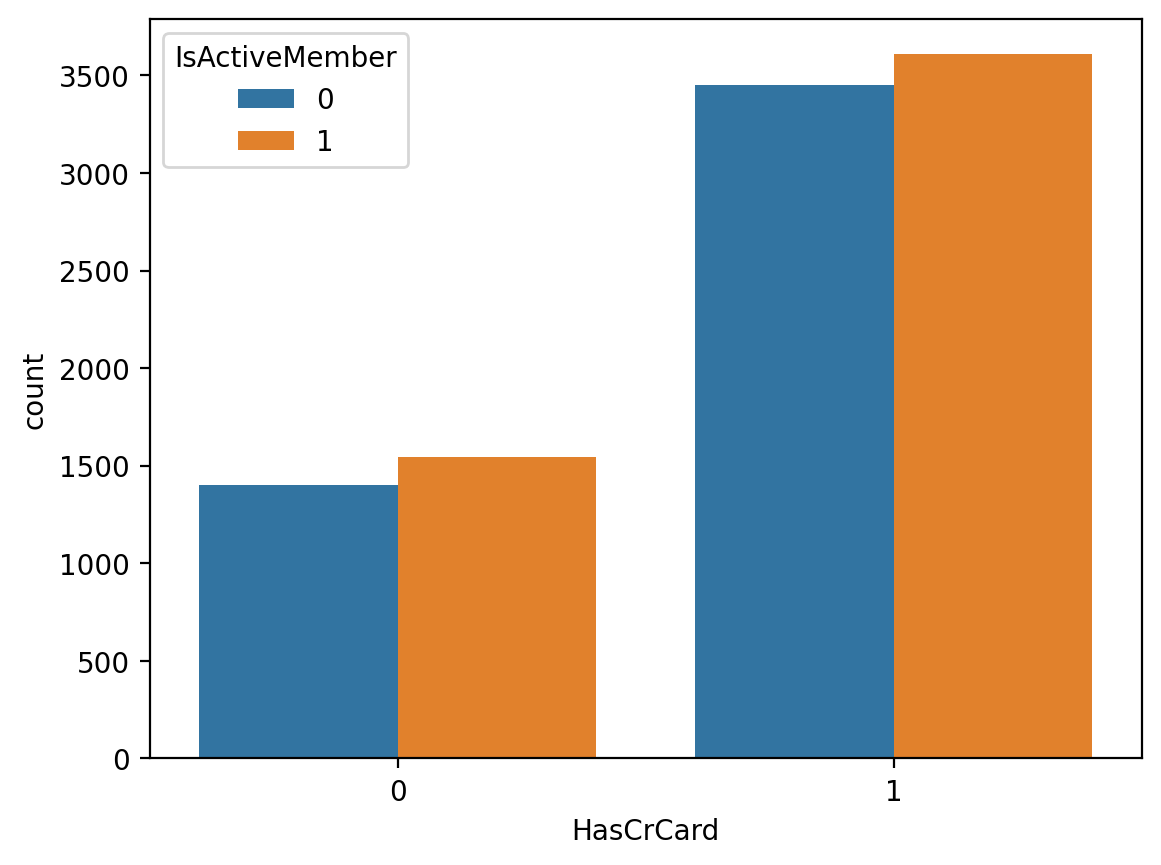

In [78]:
sns.countplot(x ='HasCrCard',hue='IsActiveMember',data=df)

<Axes: xlabel='Tenure', ylabel='count'>

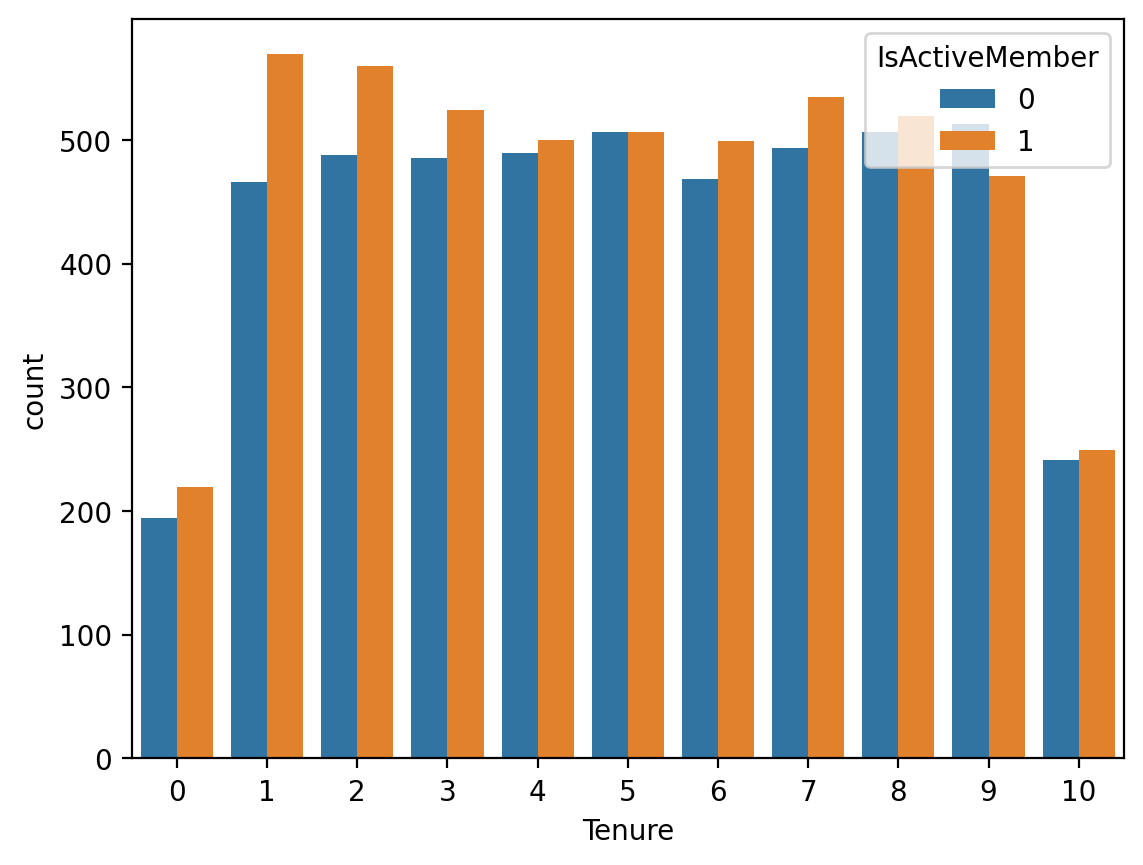

In [79]:
sns.countplot(x ='Tenure',hue='IsActiveMember',data=df)